In [1]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
import matplotlib.pyplot as plt

Bad value in file PosixPath('/Users/flaviopineda/.matplotlib/stylelib/style.mplstyle'), line 50 ("axes.prop_cycle : cycler('color', ['#1F77B4', '#D62728', '#2CA02C', '#FF7F0E', '#7F7F7F', '#9467BD'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: EOL while scanning string literal (<unknown>, line 1)


# Definición del modelo inflacionario y obtención de los datos del background

In [2]:
V = '0.5*m**2*phi**2'
param = {'m': 5.9e-6}

#Instancia de la clase potential
potential = PotentialFunction.from_string(V, param_values= param)

In [3]:
#Instancia de la clase background
bg = Background(potential, phi0 = 17.5)

In [4]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = (bg.data[i] for i in vars)
Nend = bg.N_end
Ne = bg.Ne

Figure saved as: figures/potential.png


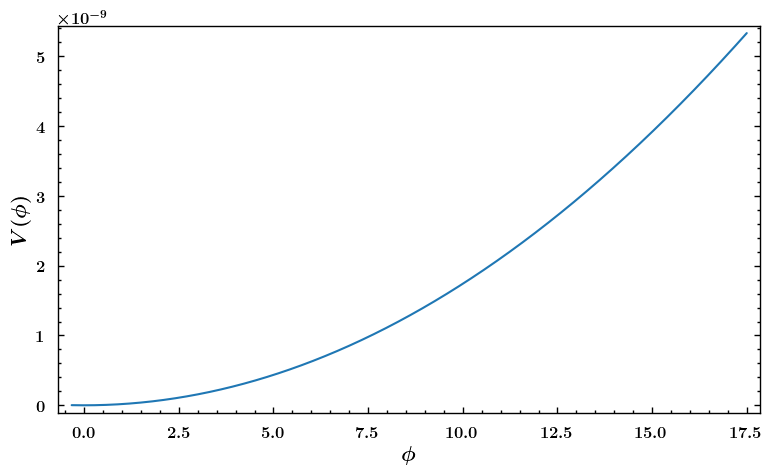

In [5]:
potential.plot_potential(min(phi), max(phi), dpi = 100, save = True)

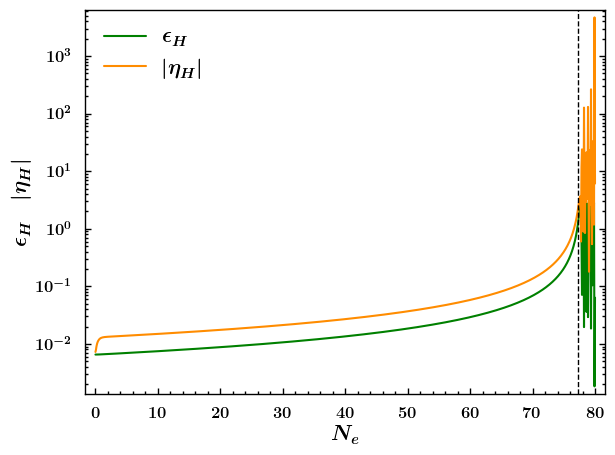

In [6]:
plt.plot(N, eps_H, label = r'$\epsilon_H$', color = 'green' )
plt.plot(N, abs(eta_H), label = r'$|\eta_H |$', color = 'darkorange')
plt.axvline(Nend, linewidth = 1, linestyle = 'dashed', color = 'k')


plt.yscale('log')
plt.xlabel(r'$N_e$')
plt.ylabel(r'$\epsilon_H\quad |\eta_H|$')
plt.legend(loc = 'best')
#plt.title('Slow-roll parameters')
plt.tight_layout()
plt.show()


# Perturbaciones primordiales y espectro primordial de potencias

In [7]:
pert = Perturbations(potential, bg, scale= 'CMB', N_CMB = 60)
k = pert.k_CMB
Npivot = pert.N_hc(k = k)
Nin = pert.N_ini(k = k)
Nshs = pert.N_shs(k = k)
sol = pert.solver()
pert.N_hc()

[(10.19719719719714, 4.819179017475227e-05),
 (10.259320066748025, 5.12566748876735e-05),
 (10.321443435696045, 5.4516479072758675e-05),
 (10.383567312405079, 5.798359915081557e-05),
 (10.445691582515598, 6.167121992591163e-05),
 (10.50781621816314, 6.559336472469845e-05),
 (10.569941294736328, 6.976494872447949e-05),
 (10.632066913098111, 7.420183567281726e-05),
 (10.694192974070043, 7.892089821437555e-05),
 (10.756319404739228, 8.394008205440595e-05),
 (10.818446232079909, 8.9278474202882e-05),
 (10.880573575775468, 9.495637555880009e-05),
 (10.942701425255512, 0.00010099537811067134),
 (11.004829669794704, 0.00010741844704678371),
 (11.066958289495032, 0.00011425000808748382),
 (11.129087368068538, 0.00012151604037158657),
 (11.191216994569304, 0.0001292441752501434),
 (11.253347062037452, 0.00013746380136326098),
 (11.315477505218894, 0.00014620617639955966),
 (11.377608359196891, 0.0001555045459632711),
 (11.439739745509772, 0.00016539427000100313),
 (11.501871635458782, 0.0001759

In [8]:
#Extrayendo datos de la clase perturbations

variables = ['N', 'R_re', 'dRdN_re','R_im', 'dRdN_im', 
                'h_re', 'dhdN_re', 'h_im', 'dhdN_im','P_s', 'P_t', 'P_s_pivot', 'P_t_pivot', 'r_pivot']
N, R_re, dRdN_re, R_im, dRdN_im, h_re, dhdN_re, h_im, dhdN_im, P_s, P_t, P_s_pivot, P_t_pivot, r_pivot = (pert.data[i] for i in variables)

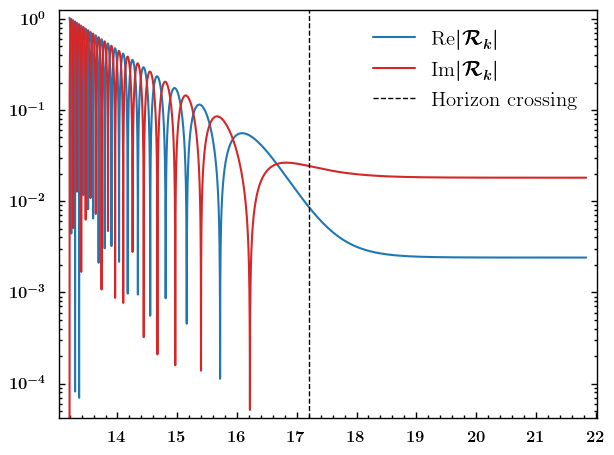

In [9]:
plt.semilogy(N, abs(R_re), label = r'$\text{Re}|\mathcal{R}_k|$')
plt.semilogy(N, abs(R_im), label = r' $\text{Im}|\mathcal{R}_k|$')
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')
plt.tight_layout()
plt.legend()


### Espectro de potencias escalar y tensorial, y la razon tenso-escalar evaluados en la escala pivote $k_* = 0.05 \text{Mpc}^{-1}$

In [10]:
P_s_pivot, P_t_pivot, r_pivot

(2.1092397509139125e-09, 2.789873588763782e-10, 0.13226915468262712)

### Cálculo del espectro de potencias para los modos observables del CMB $k \in [10^{-4}, 10]\, \text{Mpc}^{-1}$

In [11]:
PS = pert.Power_spectrum(save = True)[0]

/Users/flaviopineda/Desktop/primordialpy/primordialpy/perturbations.py:498: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'best')


Figure saved as: Figures/spectrum_scalar.png


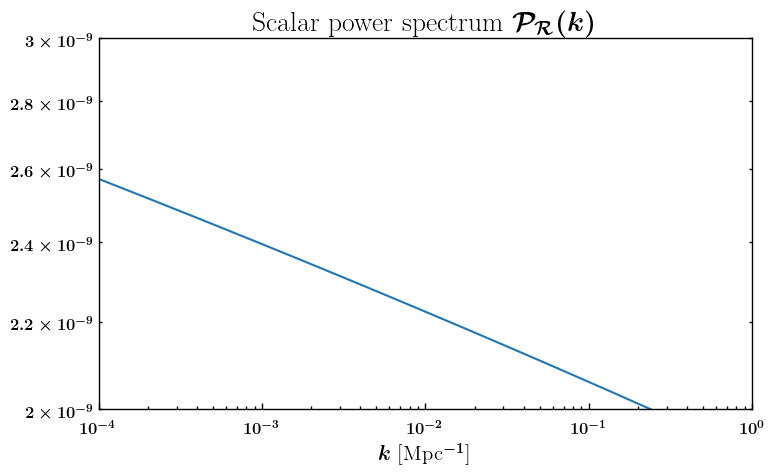

In [12]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar', save = True)


Figure saved as: Figures/tensor_to_scalar_ratio.png


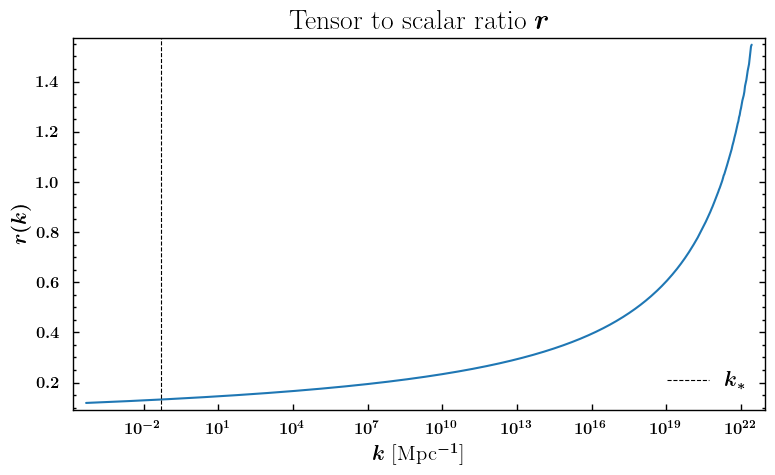

In [13]:
pert.Plot_r(dpi = 100, save = True)

In [14]:
print(pert.Spectral_tilts)


{'n_s': 0.96641200389109, 'n_t': -0.016964474384926532}
